# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

## Load the data into a DataFrame
# pd.read_csv()
df = pd.read_csv("/Users/russellsasaki/Downloads/Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [141]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

In [142]:
# Remove $ from certain columns
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [143]:
mystring = "$500"
mystring[1:]

'500'

In [144]:
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [145]:
# Drop or replace bad values
df.dropna(inplace=True)


# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)


In [222]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)


dates = dates.agg({"Date": [np.min, np.max]})
dates.columns=[''.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
lower_cutoff=pd.Timestamp('20150101')
upper_cutoff=pd.Timestamp('20151231')

mask = (dates["Dateamin"] < lower_cutoff) & (dates['Dateamax'] 
                                              > upper_cutoff)

good_stores = dates[mask]["Store Number"]

In [223]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter,Price per Bottle,bottles_sold,zip_code
22111,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,35,43127,1000,9.50,14.25,36,513.00,36.0,9.51,171.00,14.25,14.25,36,50613
47659,2015-01-08,2106,CEDAR FALLS,50613,7,1022100,410,88296,750,27.00,40.50,12,486.00,9.0,2.38,162.00,54.00,40.50,12,50613
65214,2015-01-08,2106,CEDAR FALLS,50613,7,1062310,259,43026,750,5.78,8.67,12,104.04,9.0,2.38,34.68,11.56,8.67,12,50613
66346,2015-01-08,2106,CEDAR FALLS,50613,7,1081200,305,73055,750,12.50,18.75,12,225.00,9.0,2.38,75.00,25.00,18.75,12,50613
80570,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,434,46351,1000,4.34,6.51,12,78.12,12.0,3.17,26.04,6.51,6.51,12,50613


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [224]:
# Margin and Price per liter
df['Margin']= (df['State Bottle Retail']*df['Bottles Sold'])-(df['State Bottle Cost']* df['Bottles Sold'])
df['Price per Liter']= df['Sale (Dollars)']/ df['Volume Sold (Liters)']
df['Price per Bottle']=df['Sale (Dollars)']/df['Bottles Sold']
df['bottles_sold']=df['Bottles Sold']
df['zip_code']=df['Zip Code']
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter,Price per Bottle,bottles_sold,zip_code
22111,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,35,43127,1000,9.50,14.25,36,513.00,36.0,9.51,171.00,14.25,14.25,36,50613
47659,2015-01-08,2106,CEDAR FALLS,50613,7,1022100,410,88296,750,27.00,40.50,12,486.00,9.0,2.38,162.00,54.00,40.50,12,50613
65214,2015-01-08,2106,CEDAR FALLS,50613,7,1062310,259,43026,750,5.78,8.67,12,104.04,9.0,2.38,34.68,11.56,8.67,12,50613
66346,2015-01-08,2106,CEDAR FALLS,50613,7,1081200,305,73055,750,12.50,18.75,12,225.00,9.0,2.38,75.00,25.00,18.75,12,50613
80570,2015-01-08,2106,CEDAR FALLS,50613,7,1062200,434,46351,1000,4.34,6.51,12,78.12,12.0,3.17,26.04,6.51,6.51,12,50613


In [234]:
##### Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number", 'zip_code', 'City','County Number', 'bottles_sold', 'Price per Bottle', 'Margin'], as_index=False)

sales = sales.agg({ "Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Price per Liter": np.mean
                   })
# Collapse the column indice
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns

# Quick check
sales.head()


,Store Number,zip_code,City,County Number,bottles_sold,Price per Bottle,Margin,Price per Liter mean,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,2106,50613,CEDAR FALLS,7,1,4.95,1.65,9.90,4.95,4.95,0.5,0.5
1,2106,50613,CEDAR FALLS,7,1,5.60,1.87,11.20,5.60,5.60,0.5,0.5
2,2106,50613,CEDAR FALLS,7,1,7.20,2.40,14.40,7.20,7.20,0.5,0.5
3,2106,50613,CEDAR FALLS,7,1,7.34,2.45,14.68,7.34,7.34,0.5,0.5
4,2106,50613,CEDAR FALLS,7,1,8.91,2.97,14.85,8.91,8.91,0.6,0.6


In [235]:
#jan-mar 2015



df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
mar_sales = df[mask]

# Group by store name
mar_sales = mar_sales.groupby(by=["Store Number", 'zip_code', 'City','County Number', 'bottles_sold', 'Price per Bottle', 'Margin'], as_index=False)

mar_sales = mar_sales.agg({ "Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Price per Liter": np.mean
                   })
# Collapse the column indice
mar_sales.columns = [' '.join(col).strip() for col in mar_sales.columns.values]
# Rename columns

# Quick check
mar_sales.head()


,Store Number,zip_code,City,County Number,bottles_sold,Price per Bottle,Margin,Price per Liter mean,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,2106,50613,CEDAR FALLS,7,1,4.95,1.65,9.90,4.95,4.95,0.50,0.50
1,2106,50613,CEDAR FALLS,7,1,5.60,1.87,11.20,5.60,5.60,0.50,0.50
2,2106,50613,CEDAR FALLS,7,1,10.20,3.40,17.00,10.20,10.20,0.60,0.60
3,2106,50613,CEDAR FALLS,7,1,16.38,5.46,32.76,16.38,16.38,0.50,0.50
4,2106,50613,CEDAR FALLS,7,1,42.12,14.04,56.16,42.12,42.12,0.75,0.75


In [219]:
import statsmodels.formula.api as smf 
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols




## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [246]:
zip_stores_margin15=sales.groupby(['zip_code', 'Store Number']).agg({'bottles_sold':np.sum, 'Margin':np.sum})
zip_stores_margin15.sort_values('Margin', axis=0, ascending=False).head()

,,bottles_sold,Margin
zip_code,Store Number,,
50320,2633,26847,155525.51
52402,3385,25017,136077.34
50314,4829,19800,117003.52
50311,3420,18204,102354.06
52240,2512,18271,96560.02


In [237]:
zip_stores_margin15.sort_values('bottles_sold', axis=0, ascending=False).head(15)


,,bottles_sold,Margin
zip_code,Store Number,,
50320,2633,26847,155525.51
52402,3385,25017,136077.34
50314,4829,19800,117003.52
52240,2512,18271,96560.02
50311,3420,18204,102354.06
52807,3354,12069,72531.69
50266,3814,9872,78547.44
50010,3524,9738,57485.88
51106,3447,9469,55740.74


In [238]:
sales.groupby(['zip_code', 'Store Number']).agg({'bottles_sold':np.sum, 'Margin':np.sum})

bottles_sold    Margin
zip_code Store Number                        
50002    4417                   248   1018.78
         4753                   204    491.94
50003    4384                   530   1819.35
         4678                  1662   8740.18
         4929                    84    176.16
50006    4172                   340   1897.66
         4497                   132    352.08
50009    2238                   660   3401.01
         2478                   779   4842.86
         2548                  4466  21134.80
         3644                  2208  11145.36
         3870                   324   2031.24
         4135                  1377   7359.35
         4695                   187    860.64
         4819                  1231   2835.91
         4919                   311   1182.58
50010    2500                  6806  33244.60
         2501                  5607  26108.03
         2609                   541   1867.53
         3524                  9738  57485.88
         3866                   448   2515.58
         4004                  1566   7479.18
         4015                  1360   6129.74
         4102                  1004   4358.59
         4103                   909   4717.00
         4129                  2583  16304.06
         4436                   579   2207.28
         4437                   352   1178.09
         4438                   430   1313.12
         4509                  3181  14984.82
...                             ...       ...
52803    5198                   381   1250.80
52804    2625                  7954  40677.79
         2637                  3946  17652.76
         2839                   224    843.34
         3853                  1986   3381.02
         3917                  1693   4099.37
         4638                  3655  10370.77
         4749                   305   1086.88
         4841                   392    951.46
         4952                   871   2440.47
         5003                  1917   6472.00
52806    2567                  2895  12292.40
         2838                   337   1658.36
         3776                  1716   8769.48
         3858                  1541   4357.69
         4196                  1313   5265.55
         4694                   821   2528.98
         4751                    90    473.58
         5029                  1827   6218.95
52807    2614                  7191  37172.58
         2635                  4771  25204.86
         3354                 12069  72531.69
         3540                   703   3941.61
         3715                  1231   3331.50
         3731                  1914   9043.74
         4640                  1103   3266.91
         4748                   162    573.78
         4750                   168    630.90
56201    4722                   216   1154.22
712-2    4307                   692   3359.77

[1372 rows x 2 columns]

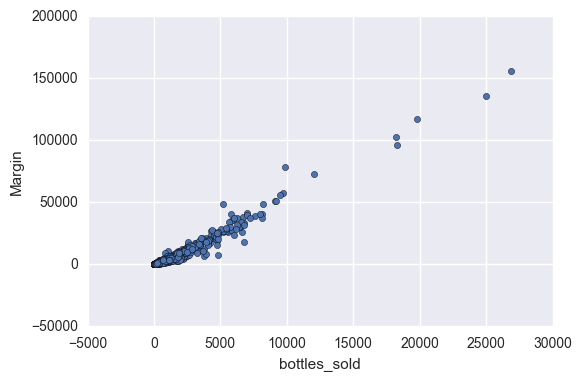

In [240]:
zip_stores_margin15.plot(kind='scatter', x='bottles_sold', y='Margin')

In [248]:
zip_stores_margin_mar=mar_sales.groupby(['zip_code', 'Store Number']).agg({'bottles_sold':np.sum, 'Margin':np.sum})
zip_stores_margin_mar.sort_values('Margin', axis=0, ascending=False).head()

,,bottles_sold,Margin
zip_code,Store Number,,
50320,2633,10131,51713.89
50314,4829,8832,50531.81
52402,3385,5997,34377.72
50311,3420,6174,28089.84
52722,3952,3759,22609.27


In [242]:
zip_stores_margin_mar.sort_values('bottles_sold', axis=0, ascending=False).head(15)


,,bottles_sold,Margin
zip_code,Store Number,,
50320,2633,10131,51713.89
50314,4829,8832,50531.81
50311,3420,6174,28089.84
52402,3385,5997,34377.72
52240,2512,4426,22131.31
52722,3952,3759,22609.27
51106,3447,3277,17806.52
51103,3820,2831,14827.91
50010,3524,2682,14541.90


In [243]:
mar_sales.groupby(['zip_code', 'Store Number']).agg({'bottles_sold':np.sum, 'Margin':np.sum})

bottles_sold    Margin
zip_code Store Number                        
50002    4417                    82    243.96
         4753                   144    216.00
50003    4384                   213    656.78
         4678                   576   2884.65
         4929                    36    114.00
50006    4172                   142    764.92
50009    2238                    49    286.28
         2478                   188   1224.94
         2548                  1083   4536.93
         3644                   840   4109.22
         3870                   108    532.14
         4135                   165    685.59
         4695                    67    247.32
         4819                   284    789.12
         4919                    66    173.32
50010    2500                  2426  11297.71
         2501                  1661   7709.54
         2609                   100    291.10
         3524                  2682  14541.90
         3866                    60    305.82
         4004                   468   2247.24
         4015                   342   1446.48
         4102                   221    864.21
         4103                   249   1469.07
         4129                   702   4005.77
         4436                   193    593.23
         4437                   111    327.74
         4438                   105    348.66
         4509                   841   4459.12
         4656                    11     44.71
...                             ...       ...
52803    4962                   893   1858.94
52804    2625                  2321  11273.92
         2637                  1386   5566.84
         2839                    87    385.81
         3853                   464    946.51
         3917                   576   1202.92
         4638                   593   1335.23
         4749                   127    338.74
         4841                    60    209.30
         4952                   176    546.77
         5003                   420   1097.61
52806    2567                   531   1934.41
         2838                   114    513.12
         3776                   756   3302.22
         3858                   459   1292.67
         4196                   197    887.23
         4694                   265    625.38
         4751                    42    202.44
         5029                   518   2042.48
52807    2614                  1981   9822.52
         2635                  1120   5925.04
         3354                  1491   9516.27
         3540                   196   1012.28
         3715                   348    911.68
         3731                   684   3231.66
         4640                   445   1526.02
         4748                    18     77.52
         4750                    12     53.88
56201    4722                    30    190.38
712-2    4307                   285   1259.54

[1261 rows x 2 columns]

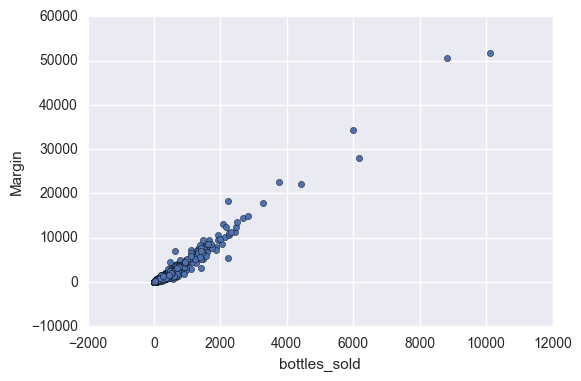

In [244]:
zip_stores_margin_mar.plot(kind='scatter', x='bottles_sold', y='Margin')

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [218]:
smf.ols('Margin~bottles_sold', data=zip_stores_margin).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.600e+04
Date:                Sun, 08 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:46:54   Log-Likelihood:                -12369.
No. Observations:                1372   AIC:                         2.474e+04
Df Residuals:                    1370   BIC:                         2.475e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     -963.6090     61.946    -15.556      0.000     -1085.129  -842.089
bottles_sold     5.4346      0.029    189.747      0.000         5.378     5.491
==============================================================================
Omnibus:                      584.603   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111059.054
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                      47.045   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
smf.ols('Margin~bottles_sold', data=zip_stores_margin_mar).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.658e+04
Date:                Sun, 08 Jan 2017   Prob (F-statistic):               0.00
Time:                        18:03:14   Log-Likelihood:                -9813.2
No. Observations:                1261   AIC:                         1.963e+04
Df Residuals:                    1259   BIC:                         1.964e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     -252.4854     18.594    -13.579      0.000      -288.963  -216.008
bottles_sold     5.1443      0.027    191.269      0.000         5.092     5.197
==============================================================================
Omnibus:                      531.001   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72436.594
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                      40.088   Cond. No.                         786.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models



# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

Looking at how many bottles sold directly correlates with how much money will be made for each store. The top five zip codes were 50320, 52402, 50315, 50311, and 52240. These numbers were a little bit different for the beginning of the years, but end of year sales are what counts. Using the OLS function showed that the correlation between bottles sold and margin mattered most. The margin is the total amount of money made after paying for the state bottle 

In [247]:
zip_stores_margin15=sales.groupby(['zip_code', 'Store Number']).agg({'bottles_sold':np.sum, 'Margin':np.sum})
zip_stores_margin15.sort_values('Margin', axis=0, ascending=False).head()

,,bottles_sold,Margin
zip_code,Store Number,,
50320,2633,26847,155525.51
52402,3385,25017,136077.34
50314,4829,19800,117003.52
50311,3420,18204,102354.06
52240,2512,18271,96560.02
